In [1]:
import utilities as u

In [2]:
import re

In [3]:
import itertools

In [4]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [5]:
import pathlib

In [6]:
directory = 'output_biases/'

dic = u.dictionary(directory)

In [7]:
analysis_directory = 'output/'

In [8]:
P = pathlib.Path(analysis_directory)

In [9]:
fgnamefile = 'tsz'
nu = 148

In [42]:
Nsims = 80

P = pathlib.Path(analysis_directory)

for i in range(1):
    
    dictionary_temp = dic.read(f'{fgnamefile}_{nu}_{i}')
    
    #Loop over the elements of the saved dictionary
    for k, element in dictionary_temp.items():
        
        total = []

        for j in range(Nsims):
            array = u.get_element(element)
            total += [array]
        
        total = np.array(total)
        
        mean, scatter = u.get_mean_and_scatter(Nsims, total)
                
        outname = f'{k}.npy'
        np.save(P/outname, mean)
        
        els = ['ells']
        if not k in els:
            outname = f'scatter_{k}.npy'
            np.save(P/outname, scatter)

In [29]:
Noah = pandas.read_csv('../extract_sehgal/Ckk_biases_lmaxT_3500.csv')

In [30]:
dictionary_temp.keys()

dict_keys(['N', 'T', 'P', 'S', 'PC', 'kk', 'kg', 'ells'])

In [33]:
read_element = lambda key: np.load(P/f'{key}.npy')

tipo = 'T'

bias = read_element(tipo)
scatters = np.load(P/f'scatter_{tipo}.npy')

kk = read_element('kk')
ells = read_element('ells')
    

    

In [34]:
getNoah = lambda e, b, f: Noah[f'{e} {b}, {f}']
getNoah_tSZ = lambda e, b: getNoah(e, b, 'tSZ')

getNoah_tSZ_trispectrum = lambda e: getNoah_tSZ(e, 'trispectrum')
getNoah_tSZ_primary = lambda e: getNoah_tSZ(e, 'primary')
getNoah_tSZ_secondary = lambda e: getNoah_tSZ(e, 'secondary')

NoahT = getNoah_tSZ_trispectrum('QE')
NoahP = getNoah_tSZ_primary('QE')
NoahS = getNoah_tSZ_secondary('QE')

NoahCents = Noah['lCen']

In [35]:
'../toNIAGARA24112020/LensQuEst-1/out_txt/'

'../toNIAGARA24112020/LensQuEst-1/out_txt/'

In [37]:
clkkmanu = 0.
for num in range(5):
    ll, clkkmanu_ = np.loadtxt(f'../toNIAGARA24112020/LensQuEst-1/out_txt/kk_{num}.txt', unpack = True)
    clkkmanu += clkkmanu_
clkkmanu /= 5

In [38]:
Plotting = u.Plotting('Biases', lminplot = 30, lmaxplot = 2000, xscale = 'log')

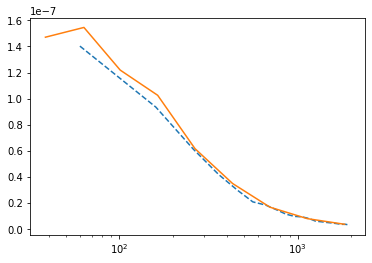

In [96]:
Plotting.plotsel(ells, kk, ls = '--')
Plotting.plotsel(ll, clkkmanu)
#plt.yscale('log')
plt.xscale('log')


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


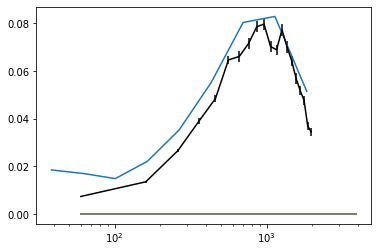

In [97]:
Plotting = u.Plotting('Biases', lminplot = 30, lmaxplot = 2000, xscale = 'log')

total = []

for j in range(Nsims):
    dictionary = dic.read(f'{fgnamefile}_{nu}_{j}')
    array = u.get_element(dictionary['T'])[0, 0]
    total += [array]
    plt.plot(ells, array, alpha = 0.1)
    

total = np.array(total)

mean, scatter_2 = u.get_mean_and_scatter(Nsims, total)

diff = total-mean

scatter = np.sum((diff)**2, axis = 0)/(Nsims-1)
scatter /= Nsims #for the mean
scatter = np.sqrt(scatter)

print(scatter/scatter_2)

Plotting.plotsel(ells, mean/kk, scatter/kk, color = 'black', filling = True)

Plotting.plotsel(NoahCents, NoahT/np.interp(NoahCents, ells, kk))

#plt.ylim(0, 4e-9)


plt.xscale('log')

plt.show()




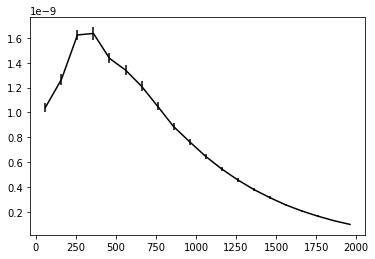

In [93]:
Plotting = u.Plotting('Biases', lminplot = 30, lmaxplot = 2000, xscale = 'log')
#Plotting.plotsel(NoahCents, NoahT, color = 'red')
#Plotting.plotsel(ells, bias[0, 0], errs = scatters[0, 1])
Plotting.plotsel(ells, mean, scatter, color = 'black')

